In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df0 = pd.read_excel('default of credit card clients.xls')

ColumnNames = df0.iloc[0]
lookup = dict(zip([str(i) for i in range(1, len(ColumnNames)+1)], ColumnNames))
df0.columns = list(lookup.values())

df0 = df0.drop(df0.index[0])#Drop first row
df0.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) #Rename column

df0 = df0.astype({'LIMIT_BAL': 'int64', 'BILL_AMT1': 'int64', \
                  'BILL_AMT2': 'int64', 'BILL_AMT3': 'int64', \
                  'BILL_AMT4': 'int64', 'BILL_AMT5': 'int64', \
                  'BILL_AMT6': 'int64', 'PAY_AMT1': 'int64',  \
                  'PAY_AMT2': 'int64', 'PAY_AMT3': 'int64',   \
                  'PAY_AMT4': 'int64', 'PAY_AMT5': 'int64',   \
                  'PAY_AMT6': 'int64'})

In [66]:
df_ori = df0

df0['SEX'].value_counts() #1 = male 18112; 2 = female 11888
df0['EDUCATION'].value_counts() #1 = graduate school 10585; 2 = university 14030; 
#3 = high school 4917; 4 = others 123, 5 280, 6 51, 0 14
df0['MARRIAGE'].value_counts() #1 = married 13659; 2 = single 15964; 
#3 = others 323, 0 54
df0['default payment next month'].value_counts() # 0 = no default 23364, 
#1 = default 6636

0    23364
1     6636
Name: default payment next month, dtype: int64

In [67]:
#format demographic values

df0['SEX']=np.where(df0['SEX'] == 1, 'male', df0['SEX'])
df0['SEX']=np.where(df0['SEX'] == 2, 'female', df0['SEX'])

df0['EDUCATION']=np.where(df0['EDUCATION'] == 1, 'graduate school', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 2, 'university', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 3, 'high school', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 4, 'others', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 5, 'unknown', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 6, 'unknown', df0['EDUCATION'])
df0['EDUCATION']=np.where(df0['EDUCATION'] == 0, 'unknown', df0['EDUCATION'])

df0['MARRIAGE']=np.where(df0['MARRIAGE'] == 1, 'married', df0['MARRIAGE'])
df0['MARRIAGE']=np.where(df0['MARRIAGE'] == 2, 'single', df0['MARRIAGE'])
df0['MARRIAGE']=np.where(df0['MARRIAGE'] == 3, 'others', df0['MARRIAGE'])
df0['MARRIAGE']=np.where(df0['MARRIAGE'] == 0, 'unknown', df0['MARRIAGE'])

df0['default payment next month']=np.where(df0['default payment next month'] == 0, 'no default', df0['default payment next month'])
df0['default payment next month']=np.where(df0['default payment next month'] == 1, 'default', df0['default payment next month'])

In [68]:
#find age ranges

df0['AGE'].sort_values().unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79], dtype=object)

In [69]:
#bucketing the ages

bins = [20,30,40,50,60,70,80]
category = ['21-30','31-40','41-50','51-60','61-70','71-80']
df0['CATEGORY'] = pd.cut(df0['AGE'],bins,labels = category)

In [70]:
df0.to_csv('TW_CC_formatted.csv', index = False, header=True)

In [71]:
#unpivot PAY_STATUS vs ID, adding MONTH

df1 = df0.iloc[:,[0, 6, 7, 8, 9, 10, 11]]
df1_unpivoted = df1.melt(id_vars=['ID'], var_name='MONTH', value_name='PAY_STATUS')
df1_unpivoted['MONTH'] = df1_unpivoted['MONTH'].str[4]

In [72]:
#unpivot BILL_AMT vs ID, adding MONTH

df2 = df0.iloc[:,[0, 12, 13, 14, 15, 16, 17]]
df2_unpivoted = df2.melt(id_vars=['ID'], var_name='MONTH', value_name='BILL_AMT')
df2_unpivoted['MONTH'] = df2_unpivoted['MONTH'].str[8]

In [73]:
#unpivot PAY_AMT vs ID, adding MONTH

df3 = df0.iloc[:,[0, 18, 19, 20, 21, 22, 23]]
df3_unpivoted = df3.melt(id_vars=['ID'], var_name='MONTH', value_name='PAY_AMT')
df3_unpivoted['MONTH'] = df3_unpivoted['MONTH'].str[7]

In [74]:
#merge three unpivoted DF together

df_1_2 = pd.merge(df1_unpivoted, df2_unpivoted, on = ['ID', 'MONTH'])
df_1_2_3 = pd.merge(df_1_2, df3_unpivoted, on = ['ID', 'MONTH'])

In [75]:
#Adding two new columns
df = pd.merge(df_1_2_3, df0.iloc[:, [0, 1, 25]], on = ['ID'])

df['BILL_UNPAID'] = df.PAY_AMT-df.BILL_AMT
df['PCT_LIMIT_USED'] = df.BILL_AMT/df.LIMIT_BAL

In [76]:
#bucketing PAY_AMT, BILL_AMT, BILL_UNPAID

bins_pa = [1,100,1000,10000,100000,1000001] #exclude 0 and negative
category_pa = ['< 100','100-999','1000-9999','10000-99999','100000-1000000']

df['PAY_AMT_CAT'] = pd.cut(df['PAY_AMT'], bins_pa, labels = category_pa)
df['PAY_AMT_CAT'] = np.where(df['PAY_AMT'] == 0, '0', df['PAY_AMT_CAT'])
df['PAY_AMT_CAT'] = np.where(df['PAY_AMT'] <0, '< 0', df['PAY_AMT_CAT'])

df['BILL_AMT_CAT'] = pd.cut(df['BILL_AMT'], bins_pa, labels = category_pa)
df['BILL_AMT_CAT'] = np.where(df['BILL_AMT'] == 0, '0', df['BILL_AMT_CAT'])
df['BILL_AMT_CAT'] = np.where(df['BILL_AMT'] <0, '< 0', df['BILL_AMT_CAT'])

bins_bu = [-1000001,-100000,-10000,-1000,-100,-0.000000001] #exclude 0 and positive
category_bu = ['-(1000000-100000)','-(99999-10000)','-(9999-1000)','-(999-100)','>-100']

df['BILL_UNPAID_CAT'] = pd.cut(df['BILL_UNPAID'], bins_bu, labels = category_bu)
df['BILL_UNPAID_CAT'] = np.where(df['BILL_UNPAID'] == 0, '0', df['BILL_UNPAID_CAT'])
df['BILL_UNPAID_CAT'] = np.where(df['BILL_UNPAID'] >0, '> 0', df['BILL_UNPAID_CAT'])

In [77]:
#bucketing PCT_LIMIT_USED

bins_pct = [0.0000000001,0.1,0.2,0.3,0.4,0.5,1] #exclude 0, larger than 1 and negative
category_pct = ['< 10%','10-20%','20-30%','30-40%','40-50%','> 50%']

df['LIMIT_USED_CAT'] = pd.cut(df['PCT_LIMIT_USED'],bins_pct,labels = category_pct)
df['LIMIT_USED_CAT'] = np.where(df['PCT_LIMIT_USED'] == 0, '0', df['LIMIT_USED_CAT'] )
df['LIMIT_USED_CAT'] = np.where(df['PCT_LIMIT_USED'] >1, '> 100%', df['LIMIT_USED_CAT'] )
df['LIMIT_USED_CAT'] = np.where(df['PCT_LIMIT_USED'] <0, '< 0', df['LIMIT_USED_CAT'] )

In [78]:
#convert MONTH to numeric/string formats, also adding YEAR
#original Month: 1 - Sep 2005, 2 - Aug 2005, 3 - Jul 2005, 4 - Jun 2005, 5 - May 2005, 6 - Apr 2005

df['MONTH'] = df['MONTH'].replace({'1':'September', '2':'August', '3':'July', '4':'June', '5':'May', '6':'April'})
df['MONTH_NUM'] = df['MONTH'].map({'September':'9', 'August':'8', 'July':'7', 'June':'6', 'May':'5', 'April':'4'})
df['MONTH_NUM'] = pd.to_numeric(df['MONTH_NUM'])

df = df.assign(YEAR = 2005)

#pd.set_option("max_rows", None)

In [79]:
#adding demographic data back to unpivoted DF

df = pd.merge(df, df0.iloc[:, [0, 2, 3, 4, 5]], on = ['ID'])

In [80]:
df.to_csv('TW_CC_unpivot.csv', index = False, header=True)

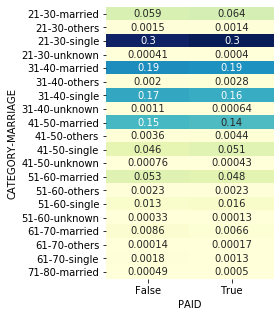

In [70]:
#pay_amt vs demographic

plt.figure(figsize=(3, 5))

sns.heatmap(pd.crosstab([df.CATEGORY, df.MARRIAGE], df.PAY_AMT != 0, colnames=['PAID'], normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

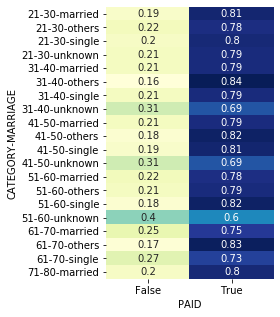

In [69]:
plt.figure(figsize=(3, 5))

sns.heatmap(pd.crosstab([df.CATEGORY, df.MARRIAGE], df.PAY_AMT != 0, colnames=['PAID'], normalize='index'),
            cmap="YlGnBu", annot=True, cbar=False)

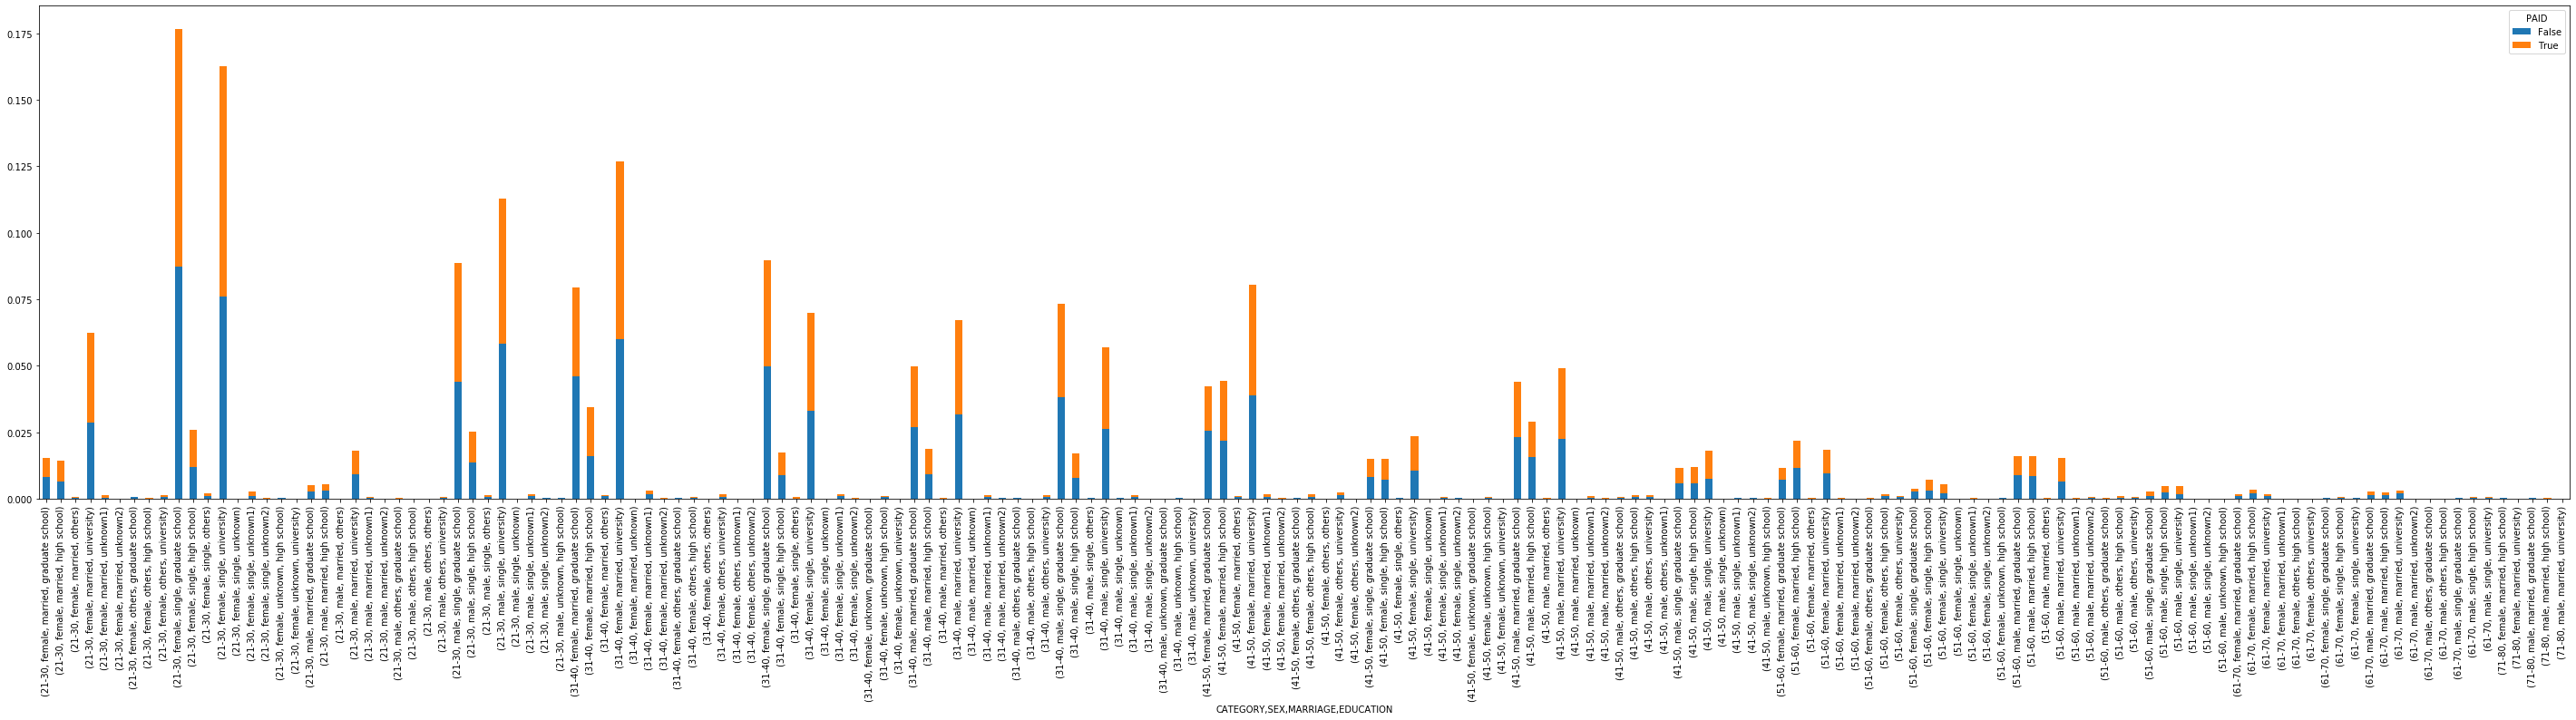

In [102]:
pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], df.PAY_AMT != 0, \
            colnames=['PAID'], normalize='columns').plot(kind='bar', stacked='True', figsize=(50,10), fontsize=10)

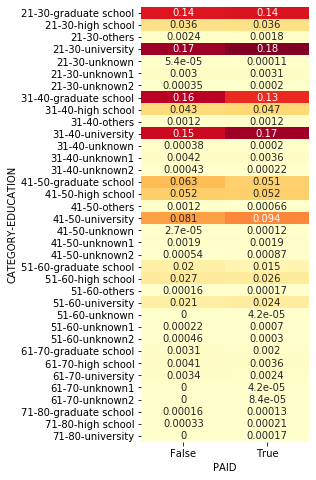

In [58]:
plt.figure(figsize=(3, 8))

sns.heatmap(pd.crosstab([df.CATEGORY, df.EDUCATION], df.PAY_AMT != 0, \
            colnames=['PAID'], normalize='columns'), cmap='YlOrRd', annot=True, cbar=False)

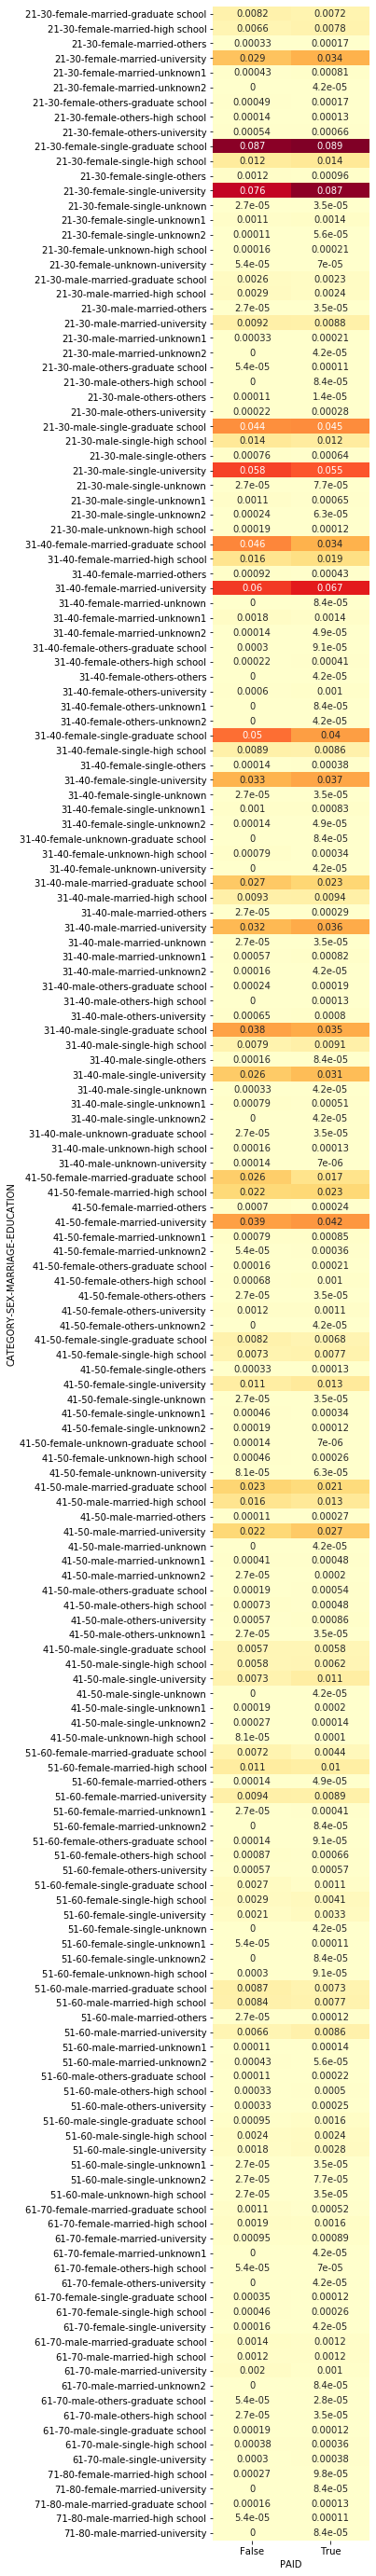

In [66]:
plt.figure(figsize=(3, 50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], df.PAY_AMT != 0, \
            colnames=['PAID'], normalize='columns'), cmap='YlOrRd', annot=True, cbar=False)

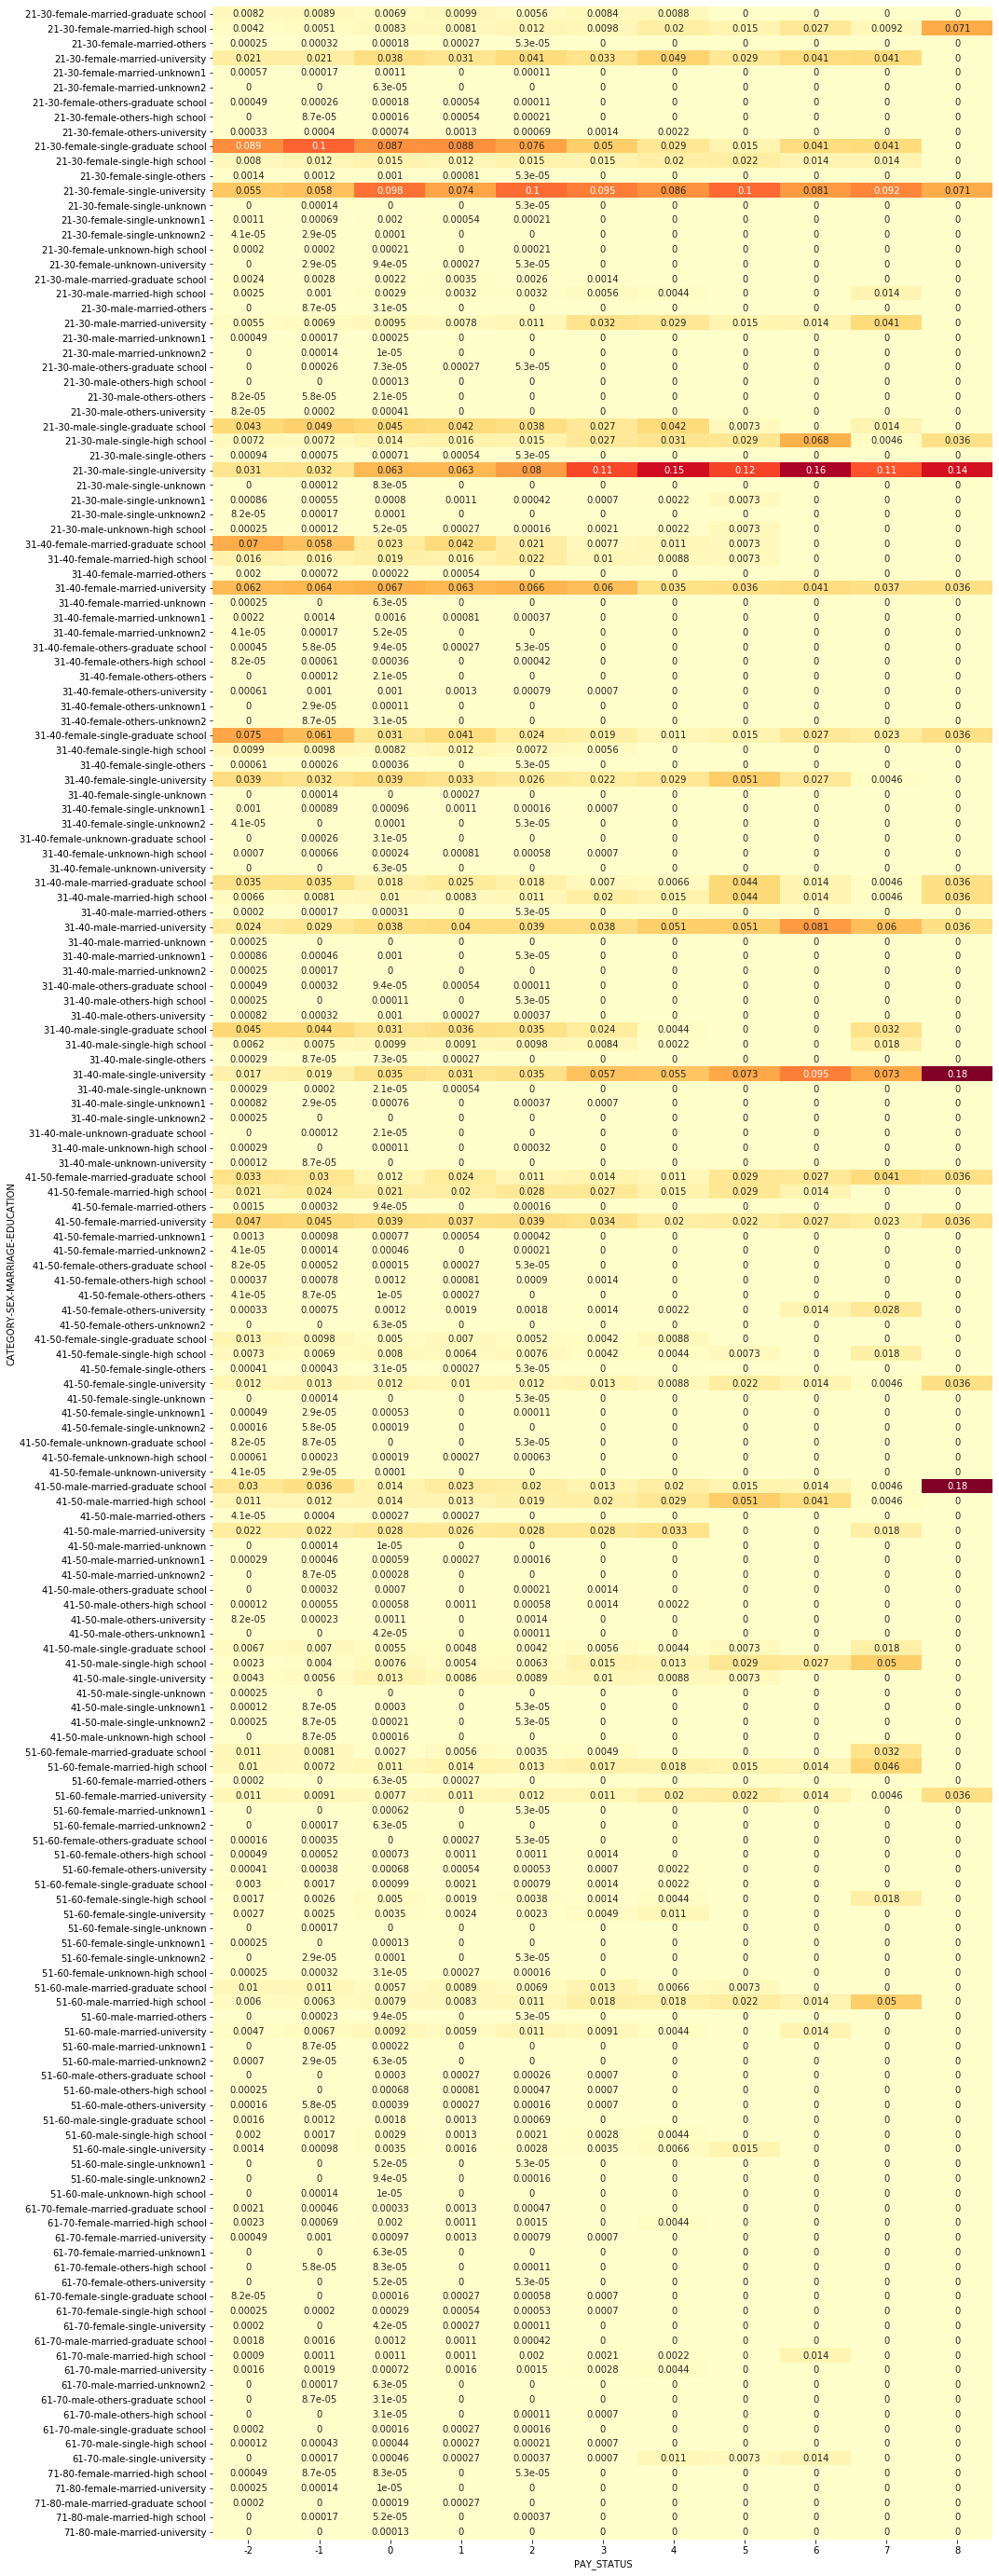

In [75]:
#PAY_STATUS vs demographics

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], df.PAY_STATUS, normalize='columns'), cmap='YlOrRd', annot=True, cbar=False)

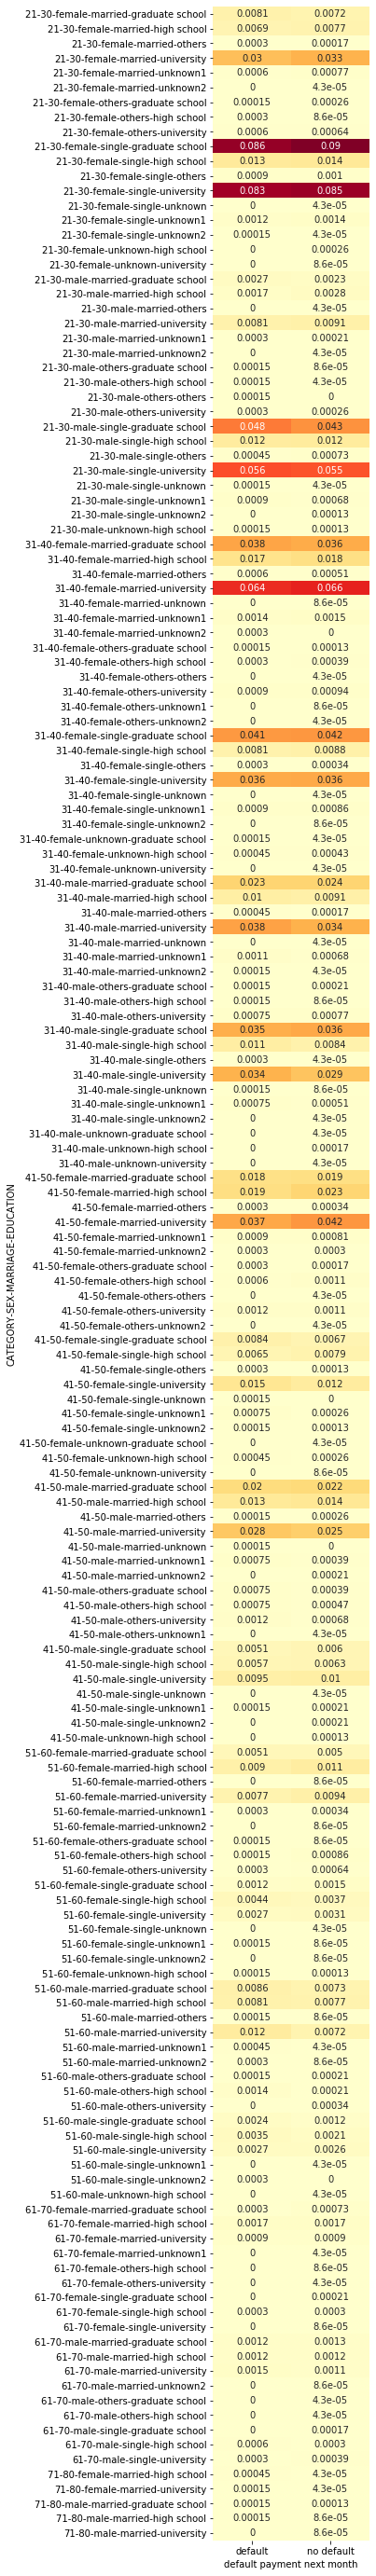

In [88]:
#default payment next month vs demographics

plt.figure(figsize = (3,50))

sns.heatmap(pd.crosstab([df0.CATEGORY, df0.SEX, df0.MARRIAGE, df0.EDUCATION], df['default payment next month'], normalize='columns'), cmap='YlOrRd', annot=True, cbar=False)